<a href="https://colab.research.google.com/github/ShahabSN/Comp_Neuro_Sci/blob/main/CNSci_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import spectrogram
!pip install ipywidgets
from ipywidgets import interact, widgets

In [3]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [4]:
data = loadmat('/content/drive/MyDrive/Colab Notebooks/computational Neuroscience /EEG_P2090.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 25 17:42:00 2023',
 '__version__': '1.0',
 '__globals__': [],
 'EEG_P2090_processed': array([[ 0.08099003,  0.38671721,  0.85455762, ...,  0.20612061,
          0.1243387 ,  0.07913327],
        [ 0.06588963,  0.42519367,  0.91695394, ...,  0.25171279,
          0.33942146,  0.45061869],
        [ 0.14993292,  0.58781633,  1.04748039, ..., -0.07837302,
          0.25798247,  0.1771873 ],
        ...,
        [-0.52378222, -0.62752993, -0.66040078, ..., -0.49474289,
         -0.54995814, -0.58349074],
        [-0.58428771, -0.83443523, -0.97892268, ..., -0.33422464,
         -0.30624082, -0.30239014],
        [-0.25038106, -0.30457022, -0.38009657, ...,  0.04978373,
         -0.10943916, -0.1790117 ]])}

In [5]:
EEG = data['EEG_P2090_processed']
EEG

array([[ 0.08099003,  0.38671721,  0.85455762, ...,  0.20612061,
         0.1243387 ,  0.07913327],
       [ 0.06588963,  0.42519367,  0.91695394, ...,  0.25171279,
         0.33942146,  0.45061869],
       [ 0.14993292,  0.58781633,  1.04748039, ..., -0.07837302,
         0.25798247,  0.1771873 ],
       ...,
       [-0.52378222, -0.62752993, -0.66040078, ..., -0.49474289,
        -0.54995814, -0.58349074],
       [-0.58428771, -0.83443523, -0.97892268, ..., -0.33422464,
        -0.30624082, -0.30239014],
       [-0.25038106, -0.30457022, -0.38009657, ...,  0.04978373,
        -0.10943916, -0.1790117 ]])

In [6]:
EEG.shape


(29, 150310)

In [7]:
number_of_channel =EEG.shape[0]
number_of_sample = EEG.shape[1]

print(f"Number of channel {number_of_channel}")
print(f"Number of sample {number_of_sample}")

Number of channel 29
Number of sample 150310


In [8]:
frequency = 500

In [9]:
time_duration = number_of_sample / frequency

print(f"the time duration of each signal is {time_duration}")
print(f"the time duration of each signal in minutes is {time_duration/ 60}")

the time duration of each signal is 300.62
the time duration of each signal in minutes is 5.0103333333333335


##Visualization

In [10]:
channel_toplot = 2
time = range(EEG.shape[1])
time

range(0, 150310)

Text(0, 0.5, 'Amplitude')

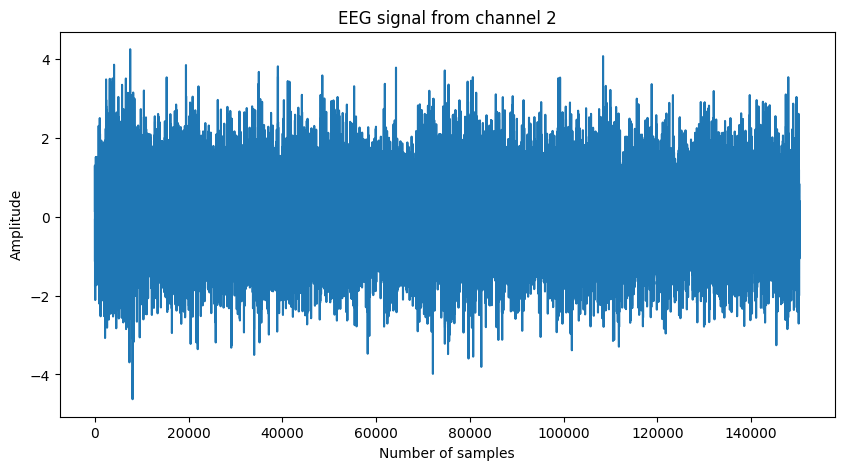

In [11]:
plt.figure(figsize = (10,5))
plt.plot(time, EEG[channel_toplot])
plt.title(f"EEG signal from channel {channel_toplot}")
plt.xlabel("Number of samples")
plt.ylabel("Amplitude")

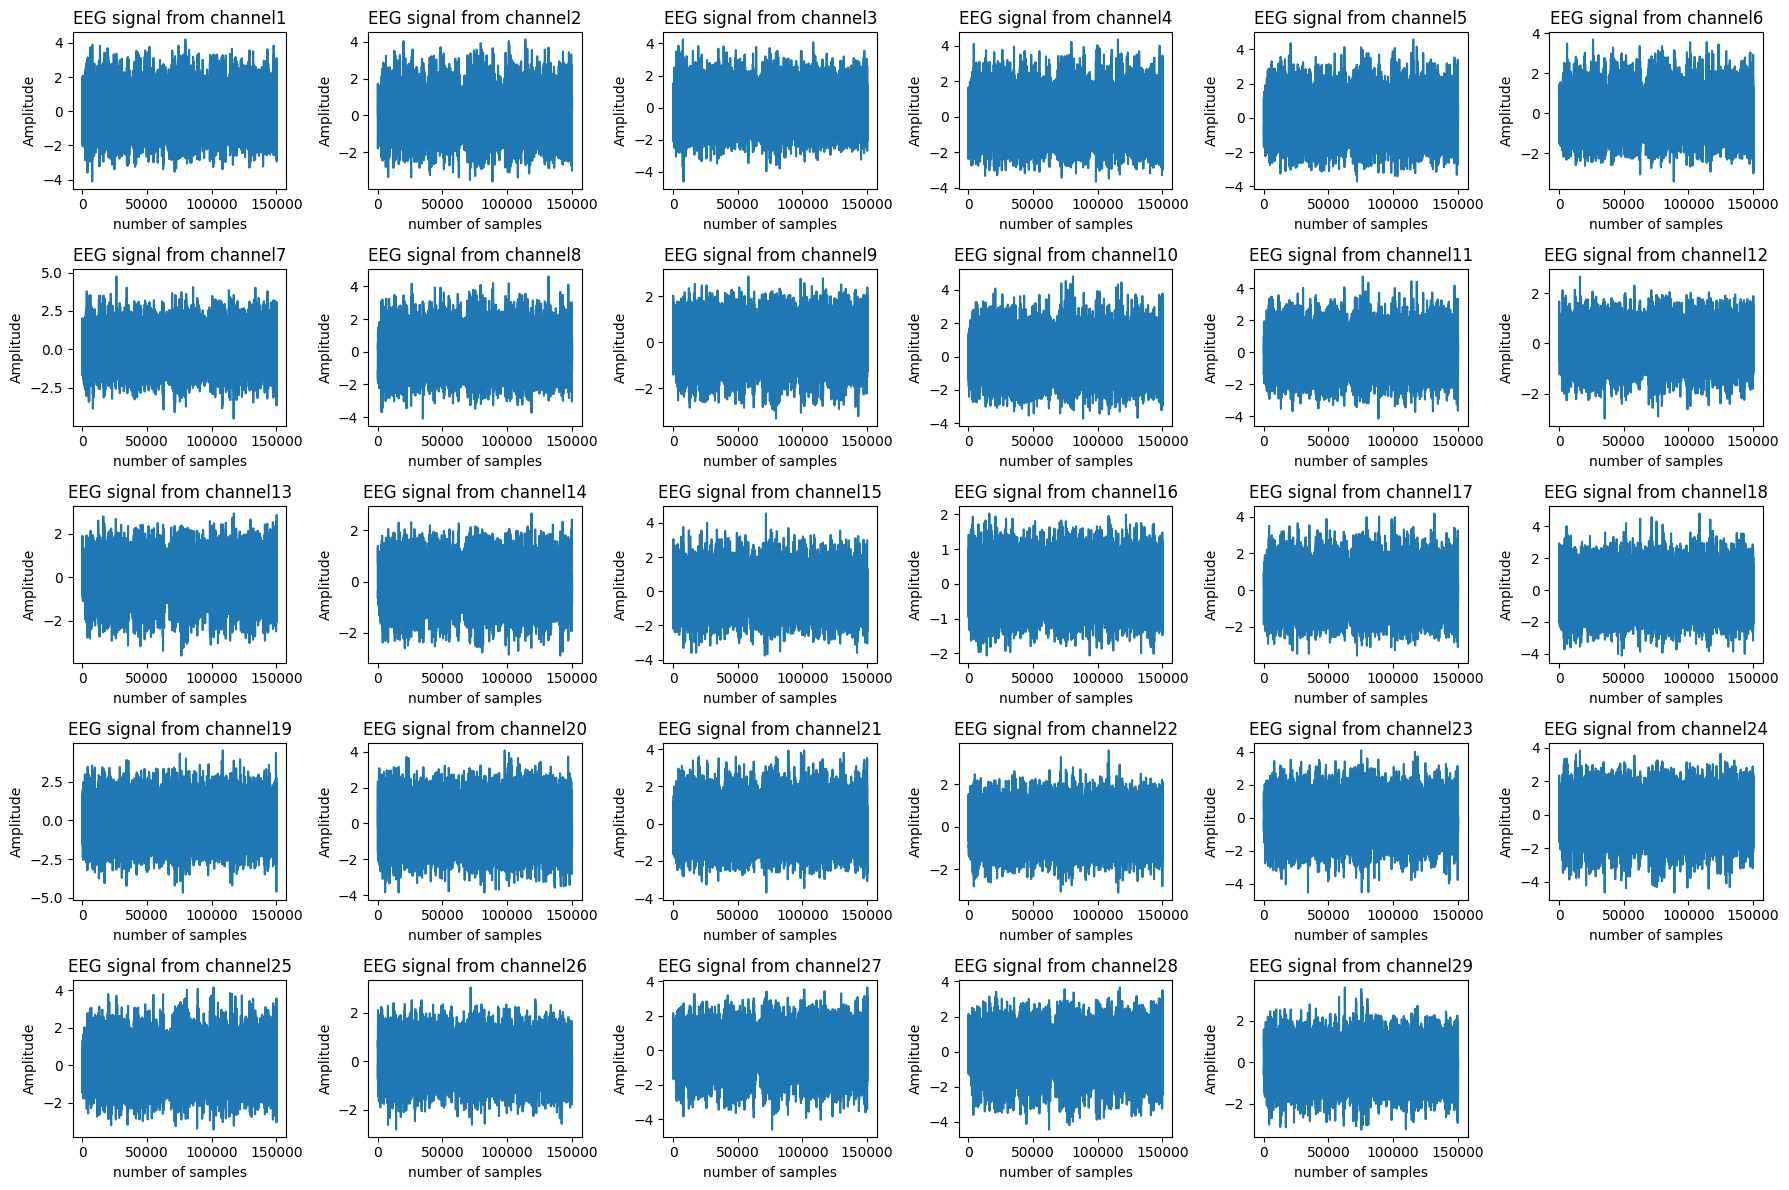

In [12]:
number_of_rows = 5
number_of_columns = 6
plt.figure(figsize =(18, 12))

for channel in range(number_of_channel):

  channel_toplot = channel
  plt.subplot(number_of_rows, number_of_columns, channel +1)
  plt.plot(EEG[channel_toplot])
  plt.title(f"EEG signal from channel{channel_toplot+ 1}")
  plt.xlabel("number of samples")
  plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [13]:
start_time = 0
stop_time = 5


In [14]:



def on_start_time_change(change):
     #start_time
    start_time = change.new

def on_end_time_change(change):
     #end_time
    stop_time = change.new

start_time_slider = widgets.IntSlider(value=0, min=0, max= time_duration, description='Start Time')
end_time_slider = widgets.IntSlider(value=24, min=0, max= time_duration, description='End Time')

start_time_slider.observe(on_start_time_change)
end_time_slider.observe(on_end_time_change)

display(start_time_slider)
display(end_time_slider)

start_sample = int(start_time * frequency)
stop_sample = int(stop_time * frequency)

IntSlider(value=0, description='Start Time', max=300)

IntSlider(value=24, description='End Time', max=300)

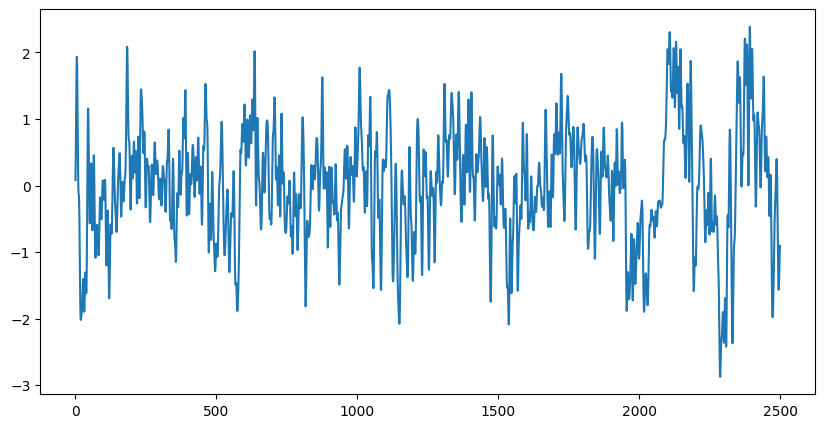

In [15]:
len(EEG[0][0:2500])
plt.figure(figsize = (10, 5))
plt.plot(EEG[0][start_sample:stop_sample])

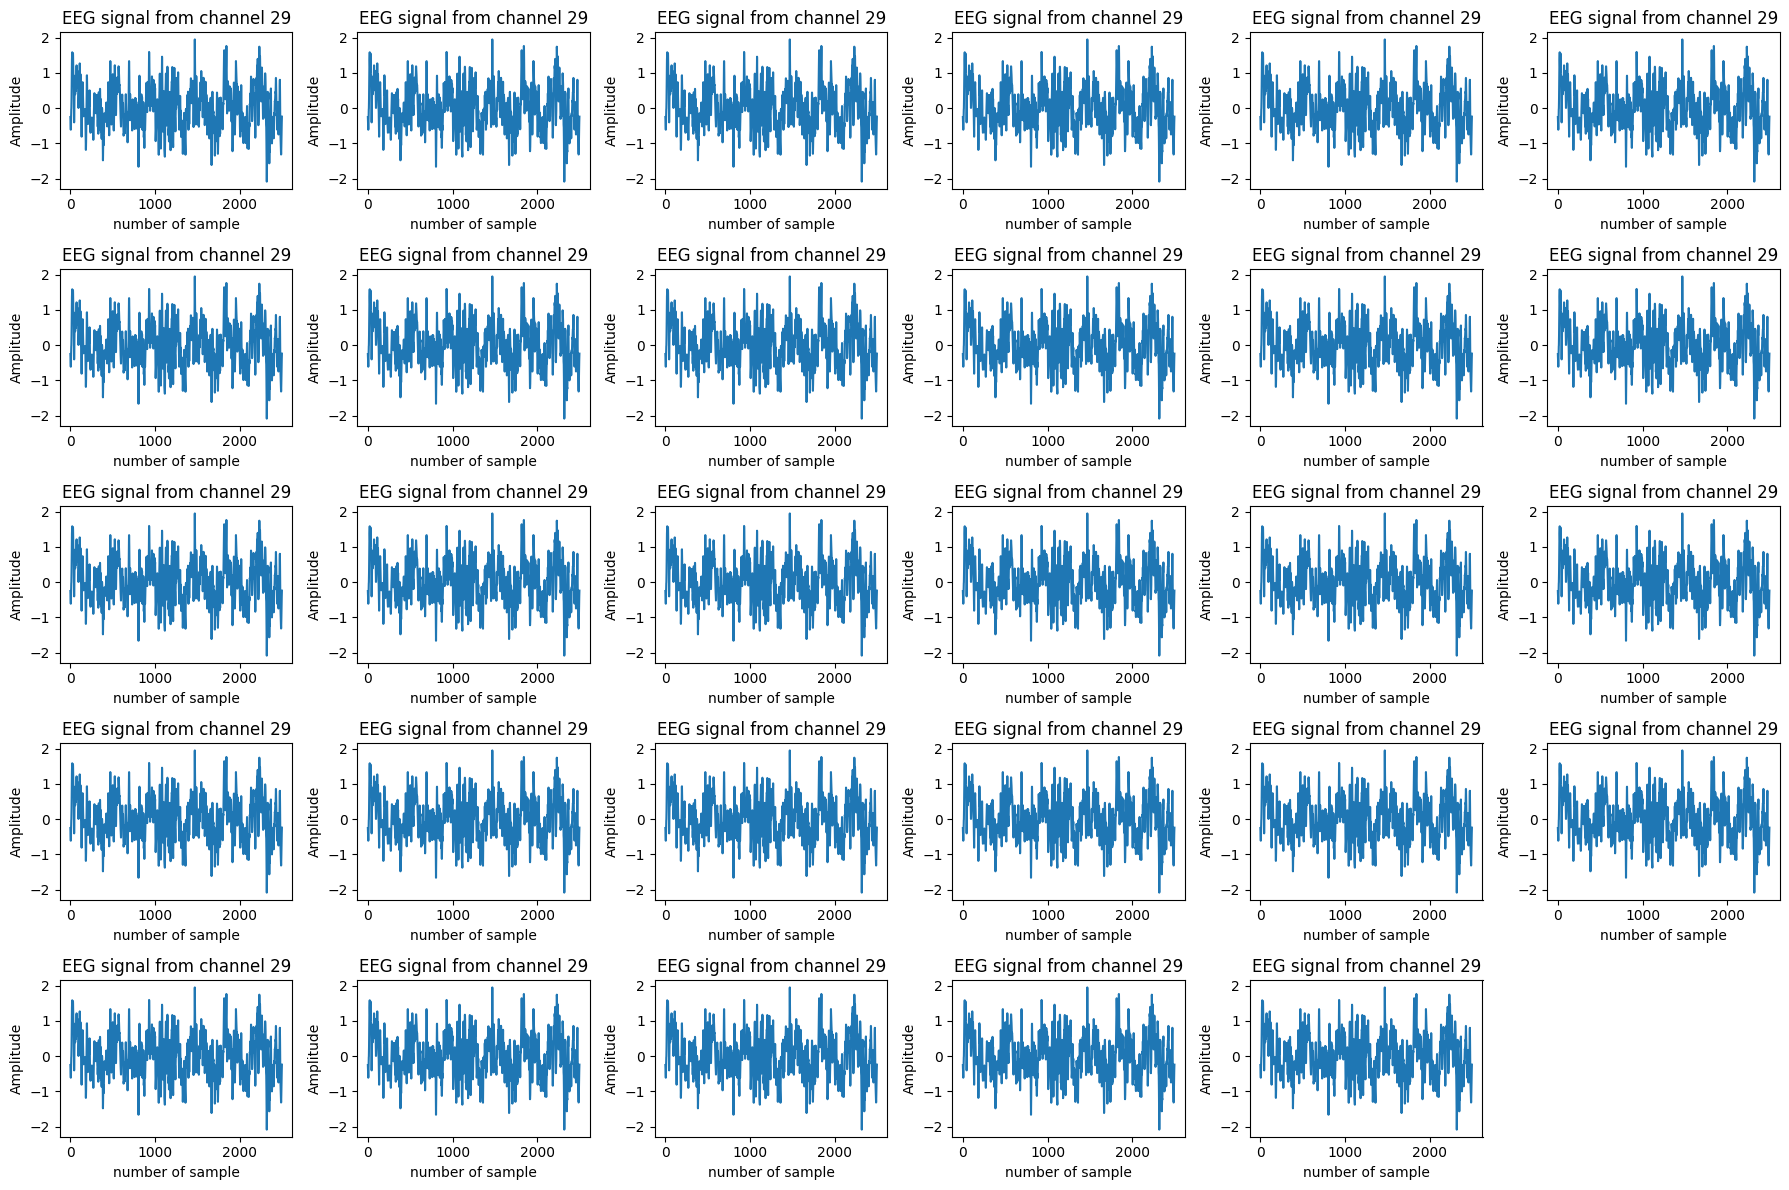

In [16]:
numnber_of_channel = EEG.shape[0]
number_of_rows = 5
number_of_columns = 6
plt.figure(figsize=(18,12))

for channel in range(number_of_channel):
  plt.subplot(number_of_rows, number_of_columns , channel+ 1)
  plt.plot(EEG[channel_toplot][start_sample:stop_sample])
  plt.title(f"EEG signal from channel {channel_toplot+1}")
  plt.xlabel("number of sample")
  plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

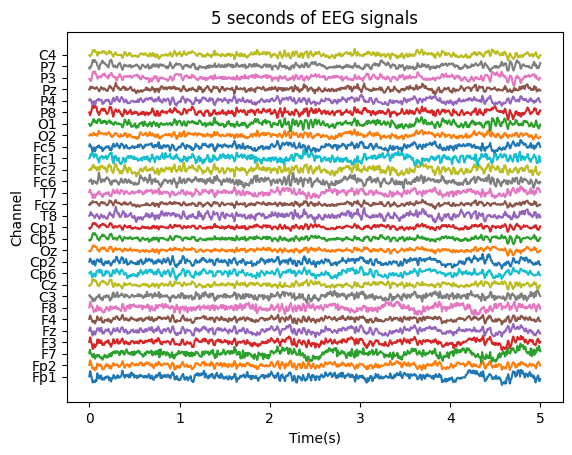

In [17]:
vertical_space = 4
duration =5
number_of_sample = duration *frequency
EEG_signal = EEG[:,: number_of_sample]
time_axis = np.arange(number_of_sample) / frequency


plt.figure.figsize= (12, 8)

for channel in range(EEG.shape[0]):
  channel_signal =EEG_signal[channel] +channel *vertical_space
  plt.plot(time_axis, channel_signal)
  channel_labels = ["Fp1", "Fp2", "F7", "F3", "Fz",  'F4', 'F8', 'C3', 'Cz', 'Cp6', 'Cp2', 'Oz','Cp5', 'Cp1', 'T8', 'Fcz', 'T7', 'Fc6', 'Fc2', 'Fc1', 'Fc5', 'O2', 'O1','P8', 'P4', 'Pz', 'P3', 'P7', 'C4' ]
  channel_position= np.arange(EEG_signal.shape[0]) *vertical_space
  plt.yticks(channel_position, channel_labels)
  plt.xlabel("Time(s)")
  plt.ylabel("Channel")
  plt.title("5 seconds of EEG signals")
plt.show()


In [19]:
a = EEG[0][0:1500]
b = EEG[27][3000:4500]

len(a)
len(b)

mean_a = np.mean(a)
mean_b = np.mean(b)

def calculate_stats(data):
  mean = np.mean(data)
  variance = np.var(data)
  std_deviation = np.std(data)
  return mean, variance, std_deviation

mean_a, var_a, std_a = calculate_stats(a)
mean_b, var_b, std_b = calculate_stats(b)

mean_a , var_a , std_a
mean_b, var_b, std_b

(-0.039820799274418596, 1.09205487364423, 1.045014293511926)

##Spectrum

In [29]:
a = EEG[0][0:2500]
a.shape
frequency = 500
t = np.arange(0, len(a))/frequency
dt = t[1] - t[0]

print("===> a is: ", a)
print("===> shape a is : ", a.shape)
print("===> t is: ", t)
print("===> dt is: ", dt)

===> a is:  [ 0.08099003  0.38671721  0.85455762 ... -1.20410593 -1.01869723
 -0.90686426]
===> shape a is :  (2500,)
===> t is:  [0.000e+00 2.000e-03 4.000e-03 ... 4.994e+00 4.996e+00 4.998e+00]
===> dt is:  0.002


In [30]:
N = len(a)  # len a * time scope of samples 0.002 m s = 5 minutes
T = N * dt

print("===> N is: ", N)
print("===> T is: ", T)

===> N is:  2500
===> T is:  5.0


In [33]:
xf = fft(a - np.mean(a))
xfj = xf.conj()
sxx = 2*dt **2 / T *(xf * xfj)

print("===> xf is :", xf)
print("===> xfj is : ", xfj)
print("===> Sxx is : ", sxx)

===> xf is : [-2.97539771e-14 +0.j         -6.33940048e+00 -8.06617169j
 -2.72456519e+01-24.3034994j  ... -2.93986704e+01-39.88729637j
 -2.72456519e+01+24.3034994j  -6.33940048e+00 +8.06617169j]
===> xfj is :  [-2.97539771e-14 -0.j         -6.33940048e+00 +8.06617169j
 -2.72456519e+01+24.3034994j  ... -2.93986704e+01+39.88729637j
 -2.72456519e+01-24.3034994j  -6.33940048e+00 -8.06617169j]
===> Sxx is :  [1.41647864e-33+0.00000000e+00j 1.68401799e-04+9.28495823e-22j
 2.13277701e-03+2.85783272e-20j ... 3.92844517e-03+2.63938574e-20j
 2.13277701e-03+8.27043621e-21j 1.68401799e-04+5.51755866e-21j]


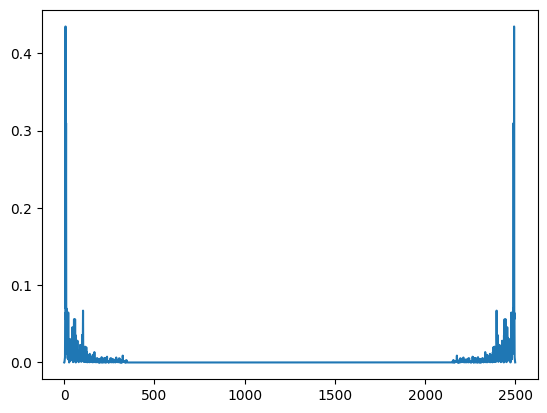

In [36]:
plt.plot(sxx)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


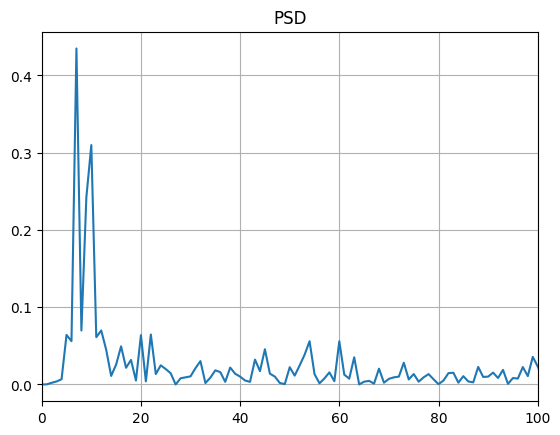

In [38]:
sxx = sxx[:int(N/2)]

plt.plot(sxx)
plt.title("PSD")
plt.xlim([0,100])
plt.grid(True)

##Time Frequency

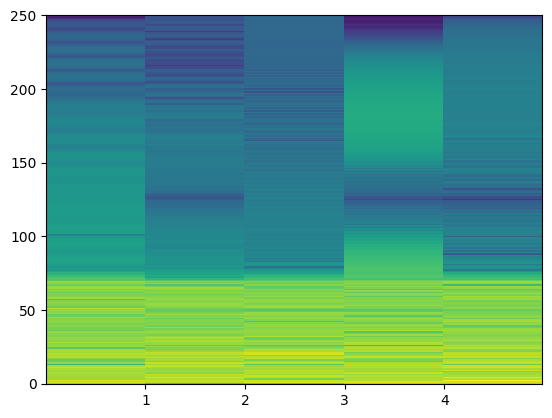

In [40]:
nfft = 500
overlap =2
frequency = 500
freqs, times, sxx = spectrogram(a,  frequency, nperseg = nfft, noverlap= overlap)

plt.pcolormesh(times, freqs, 10*np.log10(sxx))
